In [1]:
# import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [18]:
# function 

def visualization(X_train):
    X_train = X_train.reshape(X_train.shape[0], 28, 28)

    for i in range(0, 9):
        plt.subplot(330 + (i+1))
        plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
        plt.title(y_train[i]);
        

def standardize(x): 
    return (x - mean_px)/std_px

def pltGraph(y_train):
    plt.title(y_train[9])
    plt.plot(y_train[9])
    plt.xticks(range(10));
    
    
def plotResultGraph(history_dict):
    plt.clf()
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, loss_values, 'bo')
    # b+ is for "blue crosses"
    plt.plot(epochs, val_loss_values, 'b+')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    
    plt.show()
    
def getFcModel():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='Adam', 
                  loss="categorical_crossentropy",
                  metrics=['accuracy']
                 )
    model.optimizer.lr=0.01
    return model

def getCnnModel():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,(3,3), activation='relu'),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.optimizer.lr=0.01
    return model

def getBnmodel():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    model.optimizer.lr = 0.01
    return model

def getPredictionList(predictions):
    prdictList = []
    for i in range(0,len(predictions)):
        prdictList.append(np.argmax(predictions[i]).astype(int))
    return prdictList

def createDataFrameFile(predictions):
    predictionsDataFrame = pd.DataFrame({
        "ImageId": list(range(1,len(predictions) + 1)),
        "Label": getPredictionList(predictions),
    })
    return predictionsDataFrame

In [3]:
#import Data
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = (train.iloc[:,1:].values).astype("float32") # all pixel values cut label
y_train = train.iloc[:,0].values.astype("int32") # get only lable 
X_test = test.values.astype("float32")

#define global variable
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
seed = 43
np.random.seed(seed)

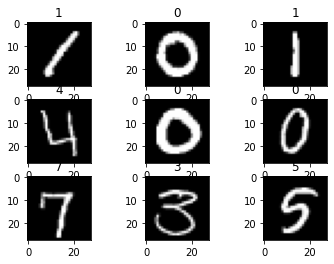

In [5]:
visualization(X_train) # visualization

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

y_train = to_categorical(y_train)
num_classes = y_train.shape[1]

C:\Users\tongn\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


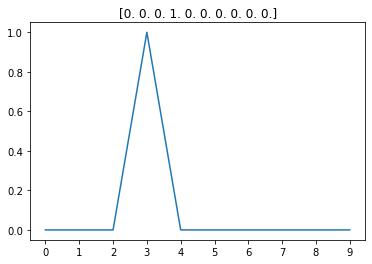

In [7]:
pltGraph(y_train)

In [8]:
#gen = image.ImageDataGenerator()

In [9]:
#Cross Validation
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

In [10]:
model = getBnmodel()
batches = gen.flow(X, y, batch_size=64)
history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=5, verbose=0)

C:\Users\tongn\AppData\Local\Temp\ipykernel_22640\1125778736.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=5, verbose=0)


In [11]:
history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/3
    1/42000 [..............................] - ETA: 55:10 - loss: 0.0838 - accuracy: 0.9531

C:\Users\tongn\AppData\Local\Temp\ipykernel_22640\473829781.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3,


42000/42000 [==============================] - 39s 916us/step - loss: 0.0855 - accuracy: 0.9743 - val_loss: 0.0651 - val_accuracy: 0.9793


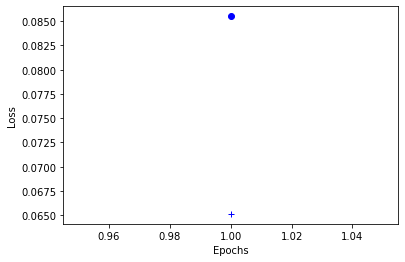

In [12]:
plotResultGraph(history.history)

In [13]:
# predict
predictions = model.predict(X_test)

875/875 [==============================] - 8s 9ms/step


In [19]:
predictionsDataFrame = createDataFrameFile(predictions)
predictionsDataFrame

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [20]:
predictionsDataFrame.to_csv("DR.csv", index=False, header=True)